In [321]:
# 1. import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import seaborn as sns
from scipy import stats
%matplotlib inline

In [322]:
# 2. load datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print('The train data shape:', train.shape)
print('The test data shape:', test.shape)

The train data shape: (1460, 81)
The test data shape: (1459, 80)


In [323]:
pd.options.display.max_columns = None
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [324]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [325]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# Target variable
Analysis on target variable


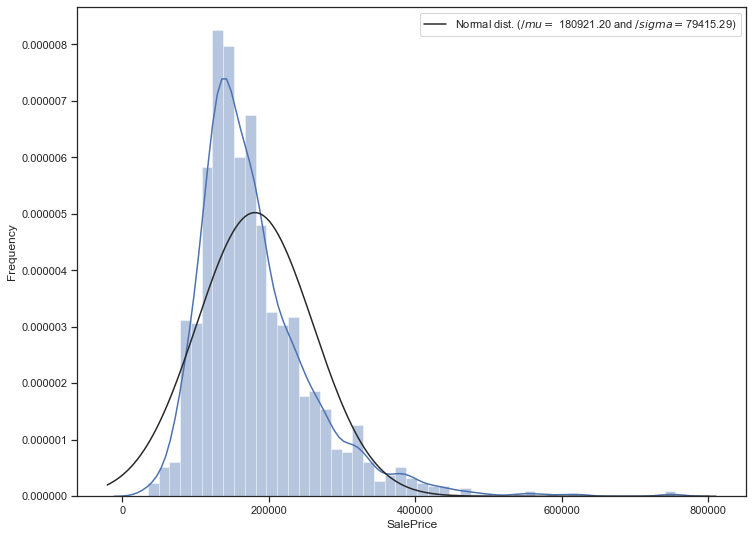

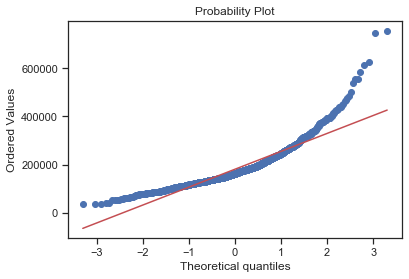

In [326]:
# Show probability plots
plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)
# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(train['SalePrice'])
# Plot with the distribution
plt.legend(['Normal dist. ($/mu=$ {:.2f} and $/sigma= ${:.2f})'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
fig = plt.figure()
stats.probplot(train['SalePrice'],plot=plt)
plt.show()
# This target variable is right skewedb

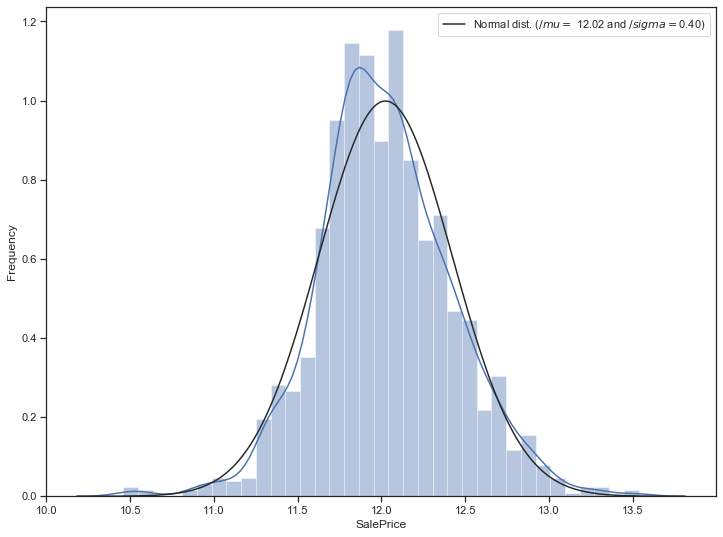

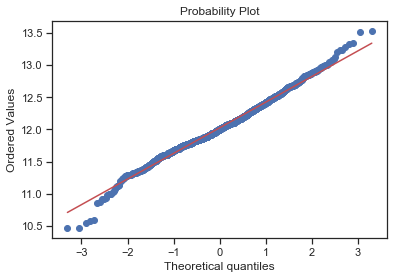

In [327]:
# Use log to make more normal distribution
train['SalePrice'] = np.log1p(train['SalePrice'])
# check again for normal distribution
plt.subplots(figsize = (12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)
(mu, sigma) = stats.norm.fit(train['SalePrice'])
plt.legend(['Normal dist. ($/mu=$ {:.2f} and $/sigma= ${:.2f})'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
fig = plt.figure()
stats.probplot(train['SalePrice'],plot=plt)
plt.show()
# This target variable is right skewedb


# Check the missing values

In [328]:
# check the columns with missing values
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

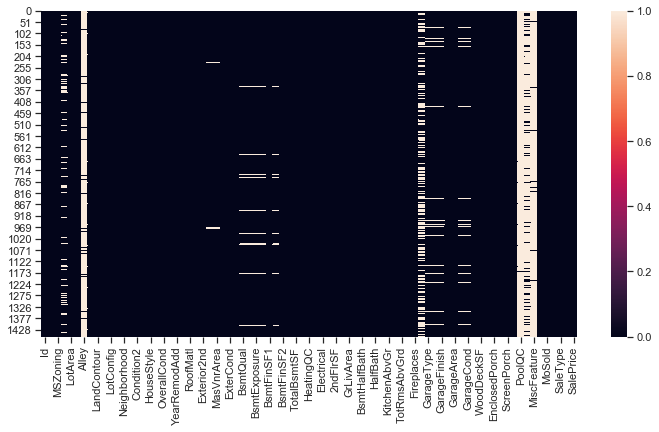

In [329]:
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull())
plt.show()

In [330]:
Isnull = train.isnull().sum()/len(train)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [331]:
Isnull = Isnull.to_frame()

In [332]:
Isnull.columns = ['count']

In [333]:
Isnull.index.names = ['Name']

In [334]:
Isnull['Name'] = Isnull.index

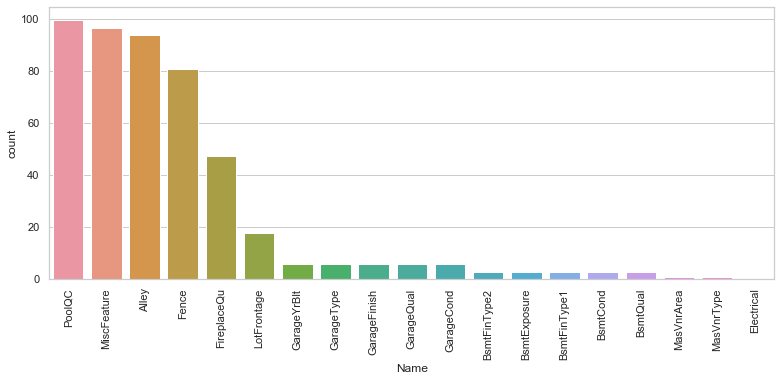

In [335]:
plt.figure(figsize=(13,5))
sns.set(style='whitegrid')
sns.barplot(x='Name', y='count', data=Isnull)
plt.xticks(rotation=90)
plt.show()

# Correlation Analysis
select features with correlation over 0.5

In [336]:
train_corr = train.select_dtypes(include = [np.number])

In [337]:
train_corr.shape

(1460, 38)

In [338]:
del train_corr['Id']

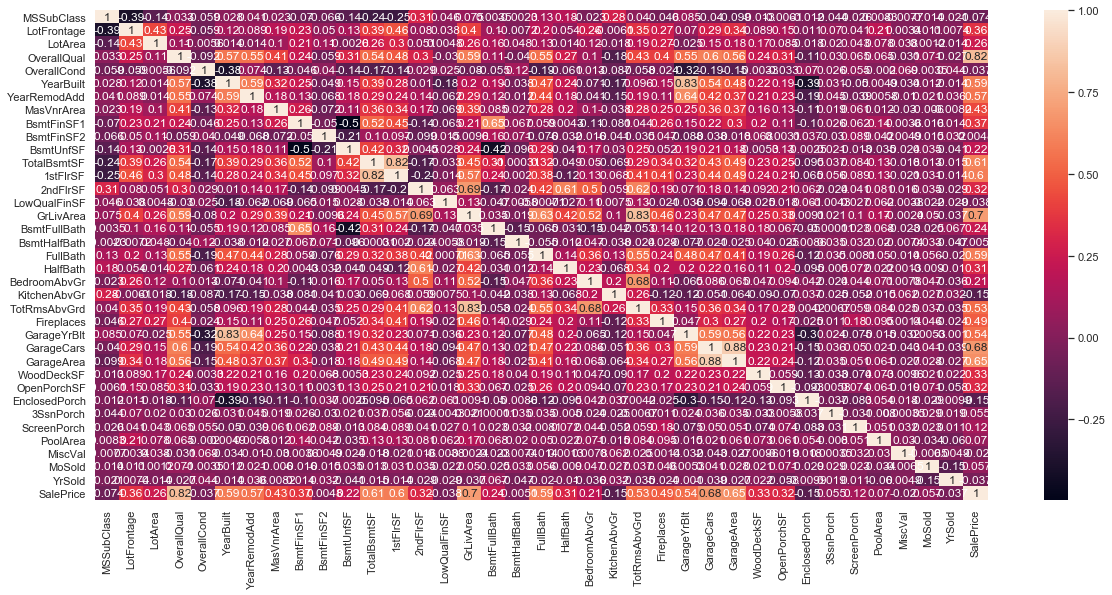

In [339]:
corr = train_corr.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr,annot=True)

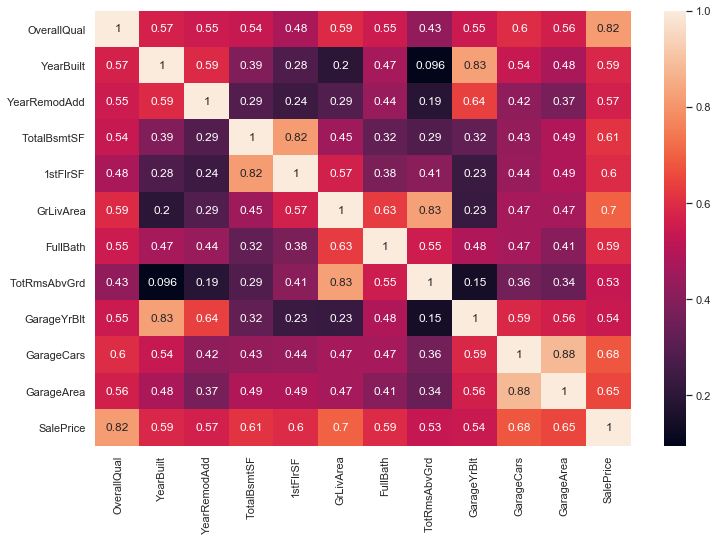

In [340]:
top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12,8))
top_corr = train[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [341]:
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [342]:
#Now check the mean price per quality and plot it.
pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
pivot

,SalePrice
OverallQual,
1,10.798825
2,11.002117
3,11.364912
4,11.589896
5,11.798112
6,11.982935
7,12.206782
8,12.505254
9,12.751303


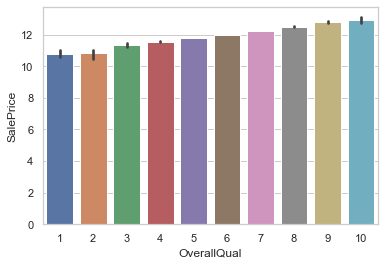

In [343]:
sns.barplot(train.OverallQual, train.SalePrice)

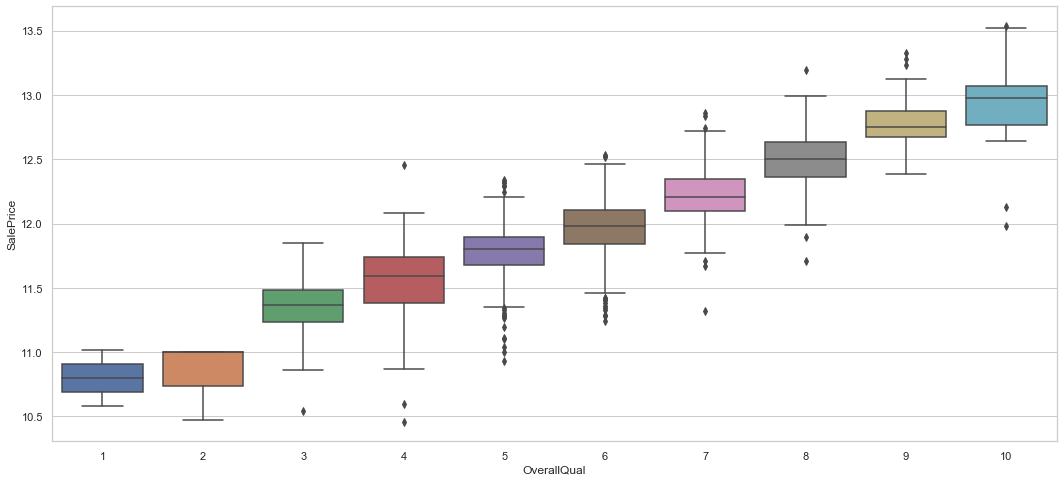

In [344]:
plt.figure(figsize = (18,8))
sns.boxplot(x=train.OverallQual,y=train.SalePrice)

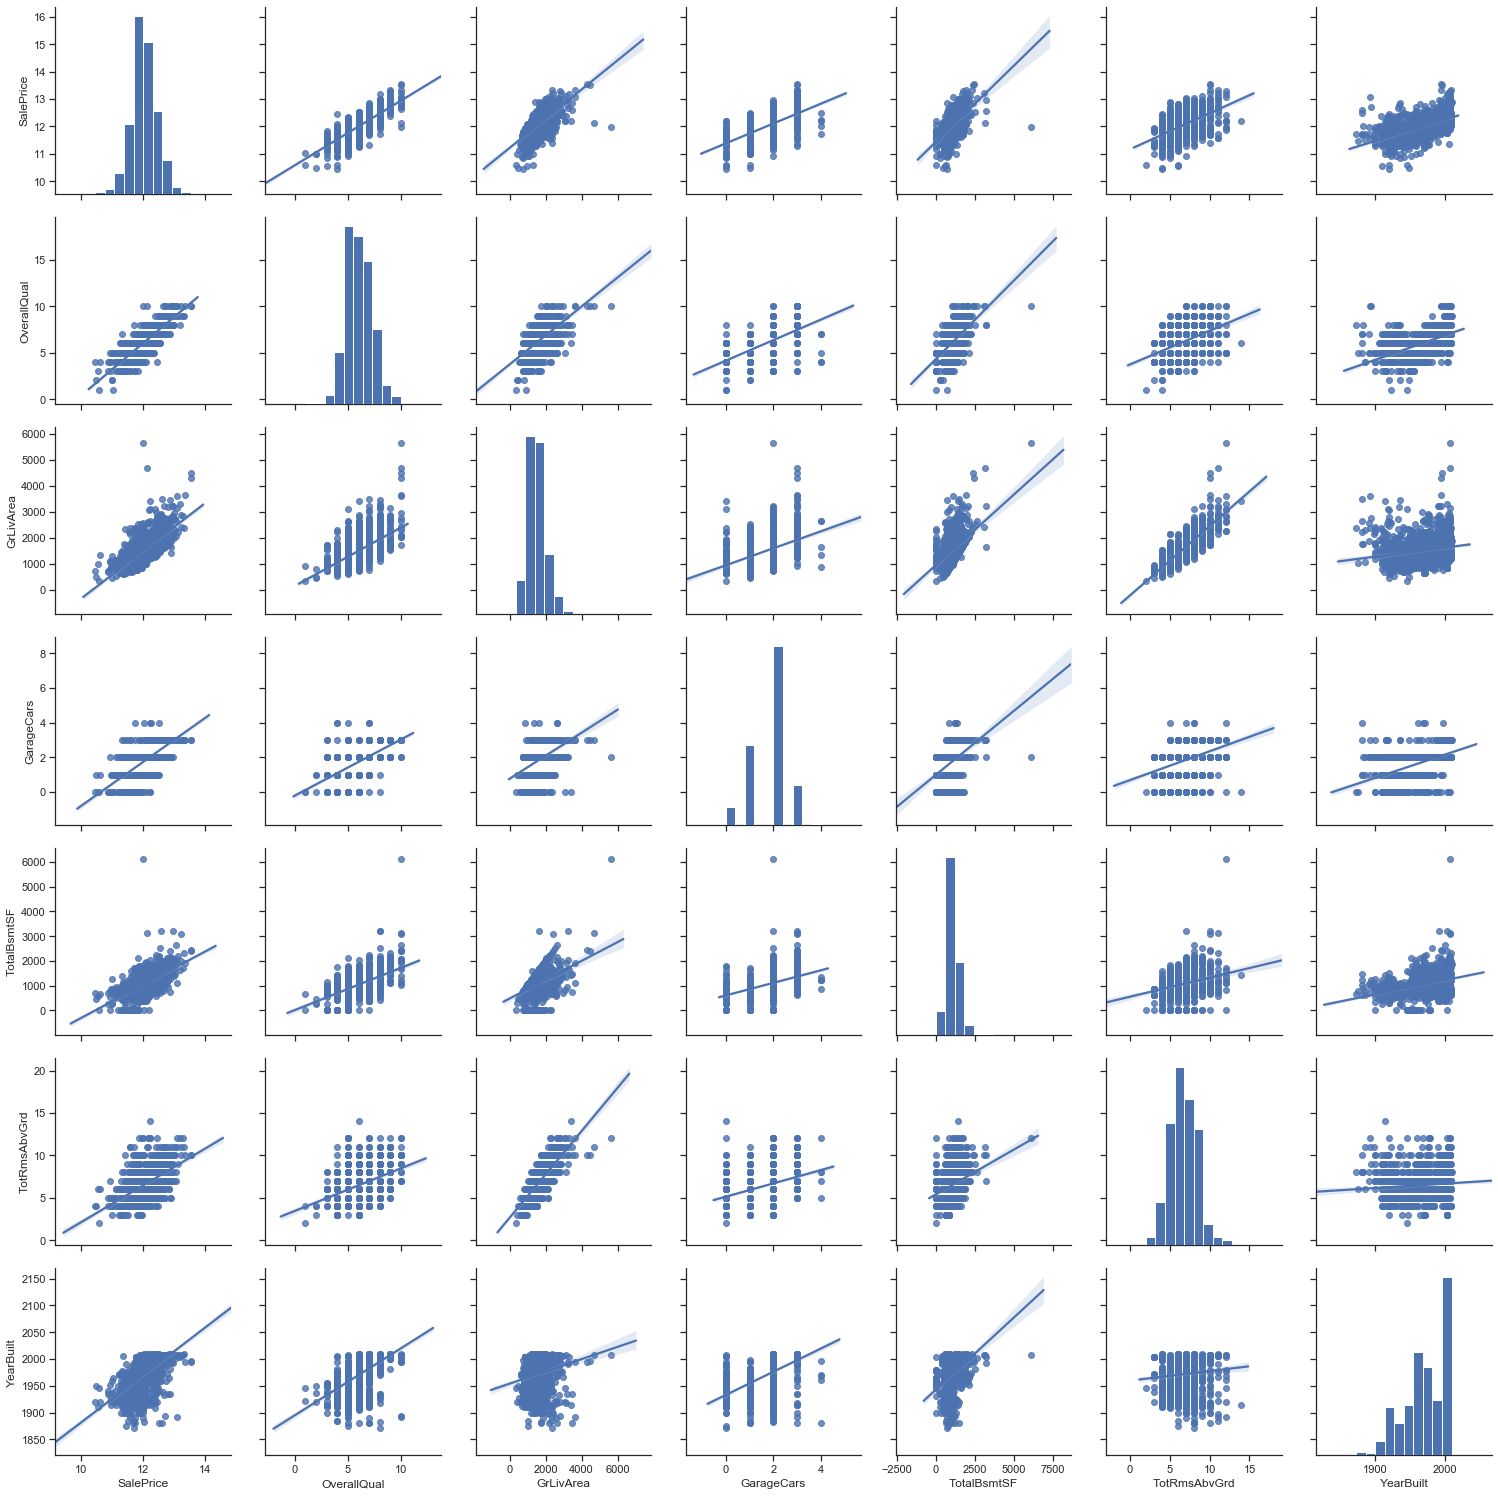

In [345]:
col = ['SalePrice','OverallQual', 'GrLivArea','GarageCars','TotalBsmtSF','TotRmsAbvGrd','YearBuilt'] 
sns.set(style= 'ticks')
sns.pairplot(train[col],height=3,kind='reg')

In [346]:
print("Find the most important features relative to target")
corr = train.corr()
corr.sort_values(['SalePrice'],ascending=False,inplace=True)
corr.SalePrice


Find the most important features relative to target


SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr

# Inputting Missing Values
PoolQC : data description says NA means "No Pool"
MiscFeature : data description says NA means "no misc feature"
Alley : data description says NA means "no alley access"
Fence : data description says NA means "no fence"
FireplaceQu : data description says NA means "no fireplace"
LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.
GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with "None".
GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0.
BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath: Replacing missing data with 0.
BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there isn't a basement.
MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'.
Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
Functional : data description says NA means typical.
Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
Exterior1st and Exterior2nd : Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
SaleType : Fill in again with most frequent which is "WD"
MSSubClass : Na most likely means No building class. We can replace missing values with None

In [347]:
test.columns[test.isnull().any()]

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')

In [348]:
test.columns[test.isnull().any()]

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')

In [349]:
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [350]:
train['PoolQC'] = train['PoolQC'].fillna('None')

In [351]:
train['MiscFeature'] = train['MiscFeature'].fillna('None')
train['Alley'] = train['Alley'].fillna('None')
train['Fence'] = train['Fence'].fillna('None')
train['FireplaceQu'] = train['FireplaceQu'].fillna('None')

In [352]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
train['LotFrontage'] = train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [353]:
#GarageYrBlt, GarageArea and GarageCars these are replacing with zero
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    train[col] = train[col].fillna(int(0))

In [354]:
#GarageYrBlt, GarageArea and GarageCars these are replacing with zero
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    train[col] = train[col].fillna(int(0))

In [355]:
#BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual these are replacing with None
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    train[col] = train[col].fillna('None')

In [356]:
#MasVnrArea : replace with zero
train['MasVnrArea'] = train['MasVnrArea'].fillna(int(0))

In [357]:
#MasVnrType : replace with None
train['MasVnrType'] = train['MasVnrType'].fillna('None')

In [358]:
#There is put mode value 
train['Electrical'] = train['Electrical'].fillna(train['Electrical']).mode()[0]

In [359]:
#There is no need of Utilities
train = train.drop(['Utilities'], axis=1)

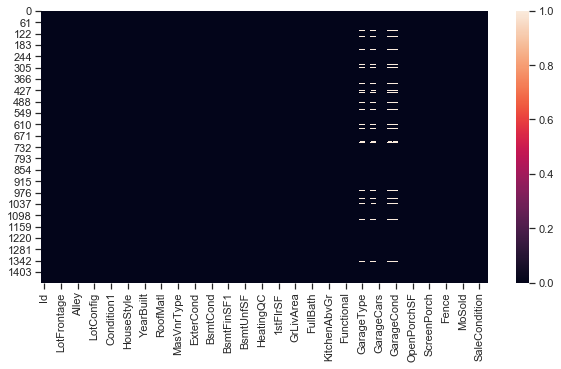

In [360]:
#Checking there is any null value or not
plt.figure(figsize=(10, 5))
sns.heatmap(train.isnull())

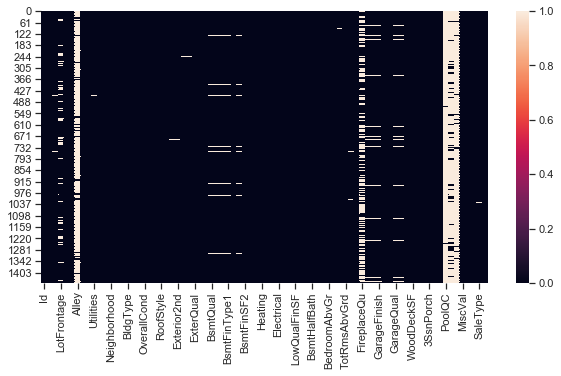

In [361]:
plt.figure(figsize=(10, 5))
sns.heatmap(test.isnull())

## Now, there is no any missing values

#### Encoding str to int

In [362]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'GarageType', 'MiscFeature', 
        'SaleType', 'SaleCondition', 'Electrical', 'Heating')

In [363]:
from sklearn.preprocessing import LabelEncoder
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values)) 
    train[c] = lbl.transform(list(train[c].values))

#### Prepraring data for prediction

In [364]:
#Take targate variable into y
y = train['SalePrice']
del train['SalePrice']


In [365]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,5,3,65.0,8450,1,1,3,3,4,0,5,2,2,0,5,7,4,2003,2003,1,1,12,13,1,128,2,4,2,2,4,3,2,706,6,0,150,856,1,0,1,0,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,3,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,3,4,1,0,1,2,8,4
1,2,0,3,80.0,9600,1,1,3,3,2,0,24,1,2,0,2,6,7,1976,1976,1,1,8,8,2,0,3,4,1,2,4,1,0,978,6,0,284,1262,1,0,1,0,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,3,4,1,0,4,1,8,4
2,3,5,3,68.0,11250,1,1,0,3,4,0,5,2,2,0,5,7,4,2001,2002,1,1,12,13,1,104,2,4,2,2,4,2,2,486,6,0,434,920,1,0,1,0,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,3,4,1,0,8,2,8,4
3,4,6,3,60.0,9550,1,1,0,3,0,0,6,2,2,0,5,7,4,1915,1970,1,1,13,15,2,0,3,4,0,4,1,3,0,216,6,0,540,756,1,2,1,0,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,3,4,1,0,1,0,8,0
4,5,5,3,84.0,14260,1,1,0,3,2,0,15,2,2,0,5,8,4,2000,2000,1,1,12,13,1,221,2,4,2,2,4,0,2,655,6,0,490,1145,1,0,1,0,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,5,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,3,4,1,0,11,2,8,4


In [366]:
#Take their values in X and y
X = train.values
y = y.values

In [367]:
# Split data into train and test formate
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

### Linear Regression

In [368]:
#Train the model
from sklearn import linear_model
model = linear_model.LinearRegression()

In [369]:
#Fit the model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [370]:
#Prediction
model.predict(X_test)

array([11.900078  , 12.16308727, 12.09111226, 11.4282733 , 11.68969179,
       12.5972805 , 11.89148802, 11.72142081, 11.83955963, 11.7379568 ,
       12.31874819, 11.97423333, 11.65922788, 12.2170442 , 12.17538348,
       12.07180565, 12.30460245, 11.80365878, 11.83608772, 11.9708567 ,
       12.14377491, 11.96331329, 11.5469511 , 12.34809563, 12.74364495,
       11.6750143 , 11.70176873, 12.12749231, 12.35450632, 11.68833581,
       12.17197307, 12.17706076, 12.55063869, 12.43824789, 12.11904875,
       12.4627276 , 11.78683409, 11.90093362, 12.54145765, 12.17780922,
       11.73049102, 12.05842322, 11.94720466, 11.73087184, 12.43879125,
       12.37022731, 12.16448364, 12.05946933, 12.61972143, 12.37558585,
       12.40885508, 12.06362692, 12.0906738 , 12.24353719, 11.90813073,
       11.6050565 , 12.5813278 , 11.95672493, 12.20366516, 12.20323843,
       11.89038273, 12.38463544, 11.96584684, 11.82639697, 11.58311745,
       12.2549885 , 11.65844343, 12.12648583, 11.99451736, 12.12

In [371]:
#Score/Accuracy
print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  89.30775659889565


### RandomForestRegression

In [372]:
#Train the modelå
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000)

In [373]:
#Fit
model.fit(X_train, y_train)
model.predict(X_test)

array([11.89422504, 12.12171411, 12.03926253, 11.71649802, 11.79828191,
       12.61305965, 11.88848962, 11.58775631, 11.85226934, 11.66587789,
       12.28325076, 12.01658696, 11.57674388, 12.1167265 , 12.19179868,
       12.08022773, 12.29491005, 12.00163351, 11.77812775, 12.12050433,
       12.18028601, 11.9086669 , 11.61979915, 12.39907561, 12.68522801,
       11.72504308, 11.58977454, 12.04804274, 12.31058436, 11.72529202,
       12.05055987, 12.11843942, 12.6167261 , 12.46424591, 12.10907739,
       12.57370499, 11.67350757, 11.86031404, 12.53227561, 12.19735446,
       11.69135141, 12.09533558, 11.9669691 , 11.88958295, 12.56230779,
       12.30447027, 12.14078401, 12.00721019, 12.39093081, 12.32098649,
       12.517745  , 11.96223489, 12.02444561, 12.23821447, 11.68530898,
       11.69422603, 12.28443348, 11.96041062, 12.15352461, 12.16520122,
       11.9498459 , 12.45841765, 11.93672043, 11.76899355, 11.61463626,
       12.10140395, 11.76859392, 12.09131166, 11.87193365, 11.92

In [374]:
#Score/Accuracy
print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  89.51082316842104


### GradientBoostingRegressor

In [375]:
#Train the model
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)

In [376]:
#Fit
GBR.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [377]:
print("Accuracy --> ", GBR.score(X_test, y_test)*100)

Accuracy -->  91.64552000752519


# prepocessing test data

3 Models have been down, now choose the GBR to get the result:

In [378]:
test.columns[test.isnull().any()]

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')

# Inputting Missing Values
* PoolQC : data description says NA means "No Pool"
* MiscFeature : data description says NA means "no misc feature"
* Alley : data description says NA means "no alley access"
* Fence : data description says NA means "no fence"
* FireplaceQu : data description says NA means "no fireplace"
* LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.
* GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with "None".
* GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0.
* BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath: Replacing missing data with 0.
* BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there isn't a basement.
* MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
* MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'.
* Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
* Functional : data description says NA means typical.
* Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
* Exterior1st and Exterior2nd : Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
* SaleType : Fill in again with most frequent which is "WD"
MSSubClass : Na most likely means No building class. We can replace missing values with None

In [379]:
test['PoolQC']=test['PoolQC'].fillna('None')

In [380]:
test['LotFrontage']=test.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [381]:
for col in ['MiscFeature','Alley','Fence','FireplaceQu','GarageType', 'GarageFinish', 'GarageQual','GarageCond']:
    test[col]=test[col].fillna('None')

In [382]:
for col in ['GarageYrBlt', 'GarageArea','GarageCars','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath','BsmtHalfBath']:
    test[col]=test[col].fillna(int(0))

In [383]:
for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2']:
        test[col]=test[col].fillna('None')

In [384]:
for col in ['MasVnrArea','MasVnrType']:
    test[col]=test[col].fillna(int(0))

In [385]:
del test['Utilities']

In [386]:
test['MSZoning']=test['MSZoning'].fillna('RL')

In [387]:
test['Functional']=test['Functional'].fillna('None')

In [388]:
test['Exterior1st'].value_counts()

VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64

In [389]:
test['Exterior1st']=test['Exterior1st'].fillna('VinylSd')

In [390]:
test['Exterior2nd'].value_counts()

VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
AsphShn      1
Stone        1
Name: Exterior2nd, dtype: int64

In [391]:
test['Exterior2nd']=test['Exterior2nd'].fillna('VinylSd')

In [392]:
test['SaleType']=test['SaleType'].fillna('WD')

In [393]:
#predict test
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,None,Reg,Lvl,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,None,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,None,MnPrv,None,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,None,IR1,Lvl,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,None,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,None,None,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,None,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,None,MnPrv,None,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,None,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,None,None,None,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,None,IR1,HLS,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,None,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,None,None,None,0,1,2010,WD,Normal


In [394]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'GarageType', 'MiscFeature', 
        'SaleType', 'SaleCondition', 'Electrical', 'Heating')

test_le=LabelEncoder()
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(test[c].values)) 
    test[c] = lbl.transform(list(test[c].values))

In [395]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,0,2,80.0,11622,1,1,3,3,4,0,12,1,2,0,2,5,5,1961,1961,1,0,10,12,3,0,3,4,1,4,4,3,5,468.0,3,144.0,270.0,882.0,0,4,1,3,896,0,0,896,0.0,0.0,1,0,2,1,3,5,7,0,3,1,1961.0,3,1.0,730.0,4,5,2,140,0,0,0,120,0,2,2,1,0,5,4,8,4
1,1462,0,3,81.0,14267,1,1,0,3,0,0,12,2,2,0,2,6,5,1958,1958,3,0,11,13,2,58,3,4,1,4,4,3,0,923.0,6,0.0,406.0,1329.0,0,4,1,3,1329,0,0,1329,0.0,0.0,1,1,3,1,2,6,7,0,3,1,1958.0,3,1.0,312.0,4,5,2,393,36,0,0,0,0,2,4,0,12500,5,4,8,4
2,1463,5,3,74.0,13830,1,1,0,3,4,0,8,2,2,0,4,5,4,1997,1998,1,0,10,12,3,0,3,4,2,2,4,3,2,791.0,6,0.0,137.0,928.0,0,2,1,3,928,701,0,1629,0.0,0.0,2,1,3,1,3,6,7,1,5,1,1997.0,0,2.0,482.0,4,5,2,212,34,0,0,0,0,2,2,1,0,2,4,8,4
3,1464,5,3,78.0,9978,1,1,0,3,4,0,8,2,2,0,4,6,5,1998,1998,1,0,10,12,2,6,3,4,2,4,4,3,2,602.0,6,0.0,324.0,926.0,0,0,1,3,926,678,0,1604,0.0,0.0,2,1,3,1,2,7,7,1,2,1,1998.0,0,2.0,470.0,4,5,2,360,36,0,0,0,0,2,4,1,0,5,4,8,4
4,1465,11,3,43.0,5005,1,1,0,1,4,0,22,2,2,4,2,8,4,1992,1992,1,0,6,6,3,0,2,4,2,2,4,3,0,263.0,6,0.0,1017.0,1280.0,0,0,1,3,1280,0,0,1280,0.0,0.0,2,0,2,1,2,5,7,0,3,1,1992.0,2,2.0,506.0,4,5,2,0,82,0,0,144,0,2,4,1,0,0,4,8,4


In [420]:
test_pre=pd.DataFrame({'SalePrice':GBR.predict(test)},index=test.Id)
test_pre.head()

,SalePrice
Id,
1461,11.700578
1462,11.916530
1463,12.109287
1464,12.158452
1465,12.103128


In [421]:
test_pre.to_csv('test_predict.csv')